Aleksandra Hryncyszyn, Joanna Szczepaniak, Radosław Dawidowski

In [80]:
#install required libraries
%pip install spacy en_core_web_sm textblob
!python -m textblob.download_corpora

Note: you may need to restart the kernel to use updated packages.
[nltk_data] Downloading package brown to
[nltk_data]     /Users/ahryncyszyn/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ahryncyszyn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ahryncyszyn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ahryncyszyn/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package conll2000 to
[nltk_data]     /Users/ahryncyszyn/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package movie_reviews to
[nltk_data]     /Users/ahryncyszyn/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
Finis

In [81]:
import pandas as pd
import nltk
df = pd.read_csv("https://raw.githubusercontent.com/j-rossi-nl/teaching-data/main/2024_TRTM/malawi_news_2019.txt", sep="\t")

# Question 1 - Keywords extraction
* Identify 5 unigram keywords per article
* Identify 3 bigram keywords per article
* Within a document, a keywords are terms (either unigram or bigram) with the highest TFIDF coefficient
* A keyword: should not be a stopword, should be lowercase, a lemma, with at lest 2 letters
* Store the keywords into 2 columns:
  * `unigram_keywords` and `bigram_keywords`
  * as a string with keywords separated by comma, such as `flood, food, river, ...` or `major flood, ...`

In [82]:
df.head()

,news_id,date,text
0,1,2019-01-11T10:32:21,Heavy rains which fell for about three hours i...
1,2,2019-03-10T09:48:43,The Department of Disaster Management Affairs ...
2,3,2019-03-12T17:18:22,UN Secretary-General António Guterres has exte...
3,4,2019-03-13T03:08:25,President Peter Mutharika on Tuesday assured M...
4,5,2019-03-15T01:43:40,"From smiles of rains that crops are to grow, s..."


In [83]:
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

#define the preprocessing steps so they can be easily applied in one line
def preprocess_text(text):

    #tokenize the text
    words = word_tokenize(text)

    #remove stop words, lowercase, and filter out short words
    stop_words = set(stopwords.words('english'))
    words = [word.lower() for word in words if word.lower() not in stop_words and len(word) >= 2]

    #lemmatization
    lemmatizer = WordNetLemmatizer()
    words = [lemmatizer.lemmatize(word) for word in words]

    #join the words back into a string
    processed_text = ' '.join(words)

    return processed_text

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/ahryncyszyn/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/ahryncyszyn/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/ahryncyszyn/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [84]:
#apply preprocessing to the 'text' column
df['processed_text'] = df['text'].apply(preprocess_text)

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer

#create a TF-IDF vectorizer for unigrams
unigram_vectorizer = TfidfVectorizer(ngram_range=(1, 1), token_pattern = r'[a-z]{2,}')

#fit and transform the vectorizer on the preprocessed text to extract unigrams
unigram_tfidf_matrix = unigram_vectorizer.fit_transform(df['processed_text'])

#get feature names (unigrams)
unigram_feature_names = unigram_vectorizer.get_feature_names_out()
print(unigram_feature_names)
print(len(unigram_feature_names))

['aamir' 'abandon' 'abduction' ... 'zomba' 'zone' 'zunga']
4449


In [86]:
#get TF-IDF scores for each unigram word
unigram_tfidf_scores = unigram_tfidf_matrix.toarray()

#sort the list by TF-IDF score in descending order
unigram_word_tfidf_tuples = [sorted(zip(unigram_feature_names, scores), key=lambda x: x[1], reverse=True) for scores in unigram_tfidf_scores]

#extract the top N unigram keywords
df['unigram_keywords'] = unigram_word_tfidf_tuples
df['unigram_keywords'] = df['unigram_keywords'].apply(lambda x: ', '.join([word for word, _ in x[:5]]))
print(df['unigram_keywords'])

0          kawale, townships, bridge, damaged, township
1           search, rescue, provision, affected, people
2                        un, guterres, wfp, caused, ant
3      proceeding, mutharika, president, balaka, hunger
4                 notebook, learner, kimu, school, many
                             ...                       
132         southern, statement, condition, storm, read
133       production, price, increase, expected, supply
134              chimphepo, two, died, burial, sleeping
135                chakwera, bought, plan, flood, camps
136          school, learner, education, said, learning
Name: unigram_keywords, Length: 137, dtype: object


In [87]:
#create a TF-IDF vectorizer for bigrams
bigram_vectorizer = TfidfVectorizer(ngram_range=(2, 2), token_pattern = r'[a-z]{2,}')

#fit and transform the vectorizer on the preprocessed text to extract bigrams
bigram_tfidf_matrix = bigram_vectorizer.fit_transform(df['processed_text'])

#get feature names (bigrams)
bigram_feature_names = bigram_vectorizer.get_feature_names_out()

print(bigram_feature_names)
print(len(bigram_feature_names))

['aamir jakhura' 'abandon fertile' 'abandon shattered' ...
 'zone oscillating' 'zone sharing' 'zunga expressed']
19740


In [88]:
#get TF-IDF scores for each bigram word
bigram_tfidf_scores = bigram_tfidf_matrix.toarray()

#create a list of (word, TF-IDF score) tuples for bigrams
bigram_word_tfidf_tuples = list(zip(bigram_feature_names, bigram_tfidf_scores.T))

#sort the list by TF-IDF score in descending order for bigrams
bigram_word_tfidf_tuples = [sorted(zip(bigram_feature_names, scores), key=lambda x: x[1], reverse=True) for scores in bigram_tfidf_scores]

#extract the top N bigram keywords
df['bigram_keywords'] = bigram_word_tfidf_tuples
df['bigram_keywords'] = df['bigram_keywords'].apply(lambda x: ', '.join([word for word, _ in x[:3]]) if x else '')
print(df['bigram_keywords'])

0              also damaged, lilongwe city, city council
1      search rescue, provision relief, rescue operation
2        agencies the, agriculture organization, ant nio
3        proceeding mangochi, visit district, die hunger
4        due flood, phalombe district, abandon shattered
                             ...                        
132      weather condition, southern region, flood prone
133                food security, crop loss, food supply
134          chimphepo said, died due, mangochi district
135       chakwera said, heavy downpour, adaptation plan
136            chide said, right education, kondowe said
Name: bigram_keywords, Length: 137, dtype: object


In [89]:
print(df)

     news_id                 date  \
0          1  2019-01-11T10:32:21   
1          2  2019-03-10T09:48:43   
2          3  2019-03-12T17:18:22   
3          4  2019-03-13T03:08:25   
4          5  2019-03-15T01:43:40   
..       ...                  ...   
132      133  2019-01-23T10:50:33   
133      134  2019-03-20T10:25:56   
134      135  2019-01-14T09:13:59   
135      136  2019-03-18T10:46:50   
136      137  2019-03-29T12:32:39   

                                                  text  \
0    Heavy rains which fell for about three hours i...   
1    The Department of Disaster Management Affairs ...   
2    UN Secretary-General António Guterres has exte...   
3    President Peter Mutharika on Tuesday assured M...   
4    From smiles of rains that crops are to grow, s...   
..                                                 ...   
132  By Jameson Chauluka: Malawi is likely to exper...   
133  By Feston Malekezo:The food security situation...   
134  By Yohane Symon: Two people 

# Question 2 - Sentiment Polarity
* Use Spacy Text Blob to assess the sentiment polarity of each news article
* Plot the distribution of the polarity across the corpus
* Create a machine learning pipeline to discover the words mostly associated to a positive polarity
* Show the 3 words with the highest weight

In [90]:
import spacy
import pandas as pd
from textblob import TextBlob
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt

nlp = spacy.load("en_core_web_sm")

#create a column with sentiment polarity using TextBlob
df['polarity'] = df['text'].apply(lambda x: TextBlob(x).sentiment.polarity)

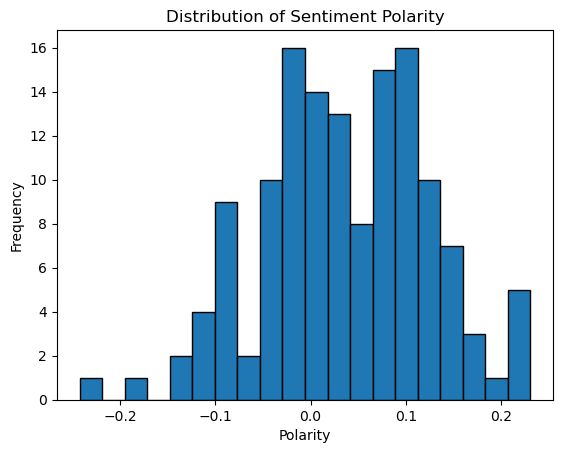

In [91]:
#plot the distribution of the polarity
plt.hist(df['polarity'], bins=20, edgecolor='black')
plt.title('Distribution of Sentiment Polarity')
plt.xlabel('Polarity')
plt.ylabel('Frequency')
plt.show()

In [92]:
#split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['polarity'] > 0, test_size=0.2, random_state=42)

print(y_train)

10     False
130     True
51     False
11     False
114    False
       ...  
71     False
106     True
14     False
92      True
102     True
Name: polarity, Length: 109, dtype: bool


In [93]:
import numpy as np

#there's class imbalance - accuracy score won't be meaningful!
print("TRAIN data:")
print("class balance: ", np.bincount(y_train))
print("TEST data:")
print("class balance: ", np.bincount(y_train))

TRAIN data:
class balance:  [36 73]
TEST data:
class balance:  [36 73]


In [94]:
from itertools import count
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split

#an attempt to use oversampling to balance the classes
#however, it prevented us from using the vectorizer in the pipeline in the next step
#so eventually it was not used
count_vectorizer = CountVectorizer(max_features=5000)
X_train_count = count_vectorizer.fit_transform(X_train)

# SMOTE [we need to be careful with strategy=1 as it can lead to overfitting]
smote = SMOTE(sampling_strategy=1)
X_resampled, y_resampled = smote.fit_resample(X_train_count, y_train)

In [95]:
#define the ML pipeline
pipeline = make_pipeline(CountVectorizer(max_features=100),
                        LogisticRegression(solver='liblinear', intercept_scaling=1, random_state=42, max_iter=100))

In [96]:
#define hyperparameters to be tuned
param_grid = {'logisticregression__C': [10**-2, 10**-1, 1, 10, 10**2], 
              'countvectorizer__max_features': [100, None]}

#perform GridSearchCV for hyperparameter tuning
grid = GridSearchCV(pipeline, param_grid, cv=5, scoring='balanced_accuracy')
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('countvectorizer',
                                        CountVectorizer(max_features=100)),
                                       ('logisticregression',
                                        LogisticRegression(random_state=42,
                                                           solver='liblinear'))]),
             param_grid={'countvectorizer__max_features': [100, None],
                         'logisticregression__C': [0.01, 0.1, 1, 10, 100]},
             scoring='balanced_accuracy')

In [97]:
from sklearn.metrics import classification_report

#evaluate and report on the model
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

       False       0.80      0.36      0.50        11
        True       0.70      0.94      0.80        17

    accuracy                           0.71        28
   macro avg       0.75      0.65      0.65        28
weighted avg       0.74      0.71      0.68        28



In [98]:
#show the 3 words with the highest weight
best_model = grid.best_estimator_.named_steps['logisticregression']
best_features = grid.best_estimator_.named_steps['countvectorizer'].get_feature_names_out()
coef = best_model.coef_[0]

#create a DataFrame to display the results
feature_weights = pd.DataFrame({'Feature': best_features, 'Weight': coef})
top_3_words = feature_weights.nlargest(3, 'Weight')
print('\nTop 3 Words with Highest Weight:')
print(top_3_words)


Top 3 Words with Highest Weight:
     Feature    Weight
4258    with  0.176589
2581    more  0.172445
2476     mcp  0.119565


# Question 3 - Named Entity Recognition
* An **ENTITY** is a word, or group of multiple words that is of a particular type ("one" and "two thousands" are numbers, "September 1st 2023" and "01-09-2023" are dates, "Michael Jordan" is a person's name, "River Gange" is a place's name)
* Use Spacy to identify all of the named entities in the articles
* Which are the top-3 most frequent labels ?
* Which are the top-3 most frequent entity text for "ORG" label ?
* Same question for the "PERSON" label ?

In [99]:
#extract only the text from the df
articles = df['text']
nlp = spacy.load("en_core_web_sm")

In [100]:
#initialize lists to store entities
entity_texts = []
entity_labels = []

In [101]:
#process each article
for article in articles:
    doc = nlp(article)

    for ent in doc.ents:

      entity_texts.append(ent.text)
      entity_labels.append(ent.label_)

In [102]:
entities = pd.DataFrame({"text": entity_texts, "label": entity_labels})
print(entities.head())

                text   label
0  about three hours    TIME
1           Lilongwe     GPE
2          yesterday    DATE
3   Chipasula Bridge  PERSON
4      Kawale Bridge     FAC


In [103]:
#top-3 most frequent labels
top_labels = entities["label"].value_counts().head(3)
print("\nTop-3 most frequent labels:")
print(top_labels)


Top-3 most frequent labels:
ORG         1051
PERSON       981
CARDINAL     651
Name: label, dtype: int64


In [104]:
#top-3 most frequent entity texts for "ORG" label
top_org_entities = entities[entities["label"] == "ORG"]["text"].value_counts().head(3)
print("\nTop-3 most frequent entities for 'ORG' label:")
print(top_org_entities)


Top-3 most frequent entities for 'ORG' label:
Chikwawa                                         34
MCP                                              20
the Department of Disaster Management Affairs    20
Name: text, dtype: int64


In [105]:
#top-3 most frequent entitity texts for "PERSON" label
top_person_entities = entities[entities["label"] == "PERSON"]["text"].value_counts().head(3)
print("\nTop-3 most frequent entities for 'PERSON' label:")
print(top_person_entities)


Top-3 most frequent entities for 'PERSON' label:
Malawi             174
Sharing             81
Peter Mutharika     23
Name: text, dtype: int64
